# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

# CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business objective of this task is to help car dealerships to understand which vehicle features/characteristics strongly influence the price of used cars so that they can work out on better inventory and pricing. Using provided dataset, we aim to identify the impact of features such as vehicle age, manufacturer, transmission type, odometer reading and other features on the car's sale price. This problem can be framed as supervised regression task where the goal is to develop and train a predictive model to identify the relationship between car's features and its price. The outcome of this task is to provide actionable insights and recommendations to dealerships so that it can help dealers in selecting the inventory with higher resale value and price the cars competitively.  

# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

## Check dataset shape

Check the number of rows (samples) and columns (features) in the dataset

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('data/vehicles.csv')

data.shape

(426880, 18)

**Observations** There are 426,880 samples in the dataset with 18 features (including the ID column)

## Check columns and missing counts

Check the details about the dataset columns and visualize the amount of missing features

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Observations**: There are significant number of missing values for certain features especially size, VIN, condition, cylinders, drive type, paint color indicating data quality issues.

## Check sample records

Display a random sample of 10 rows to visualize the data

In [153]:
data.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
350811,7303166739,rapid city / west SD,5998,"2,006.00",mini,cooper s,NaN,NaN,gas,"130,311.00",clean,automatic,NaN,NaN,NaN,NaN,NaN,sd
234273,7308727957,charlotte,7500,"2,015.00",chevrolet,malibu lt,excellent,4 cylinders,gas,"134,000.00",clean,automatic,NaN,fwd,mid-size,sedan,white,nc
315412,7306755714,east oregon,77999,"2,020.00",chevrolet,silverado deisel 3500,NaN,NaN,diesel,"10,943.00",clean,automatic,1GC4YUEY1LF186455,4wd,NaN,truck,white,or
83527,7316541369,hartford,12995,"2,010.00",bmw,750lxi,NaN,NaN,gas,"143,478.00",clean,automatic,WBAKC8C57AC430420,NaN,NaN,sedan,black,ct
213927,7316793079,minneapolis / st paul,18535,"2,014.00",jeep,grand cherokee,excellent,6 cylinders,gas,"109,996.00",clean,automatic,1C4RJFCG2EC260261,4wd,full-size,SUV,green,mn
123075,7315151647,atlanta,2400,"2,009.00",mini,cooper,NaN,NaN,gas,"168,000.00",clean,automatic,NaN,NaN,NaN,NaN,NaN,ga
390674,7313812388,fredericksburg,0,"2,020.00",toyota,corolla,NaN,NaN,gas,"2,106.00",clean,automatic,5YFEPRAE7LP141111,fwd,compact,sedan,silver,va
238406,7303848690,greensboro,54995,"2,017.00",ram,3500 laramie,NaN,NaN,diesel,"128,320.00",clean,automatic,3C63RRJL2HG577448,NaN,NaN,NaN,NaN,nc
93023,7307749692,daytona beach,1,"2,017.00",subaru,wrx,excellent,4 cylinders,gas,"61,649.00",clean,other,JF1VA1B60H9821171,4wd,compact,sedan,silver,fl
316399,7315079753,eugene,0,"2,007.00",toyota,fj cruiser sport utility,NaN,NaN,gas,0.00,clean,automatic,JTEBU11F270059532,4wd,NaN,SUV,NaN,or


## Examine target variable (price)

* Summary of price column

In [154]:
pd.options.display.float_format = '{:,.2f}'.format
data['price'].describe()

count         426,880.00
mean           75,199.03
std        12,182,282.17
min                 0.00
25%             5,900.00
50%            13,950.00
75%            26,485.75
max     3,736,928,711.00
Name: price, dtype: float64

* Scatter plot to visualize the extreme outliers

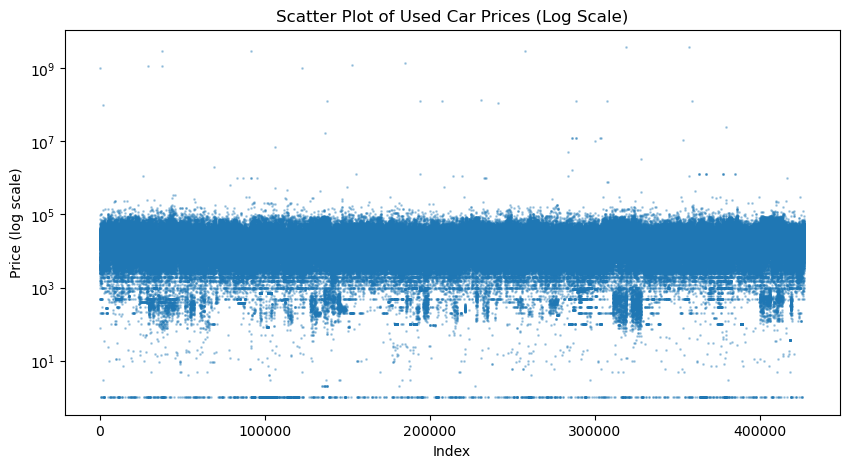

In [156]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(data)), data['price'], s=1, alpha=0.3)
plt.yscale('log')
plt.xlabel("Index")
plt.ylabel("Price (log scale)")
plt.title("Scatter Plot of Used Car Prices (Log Scale)")
plt.show()

* Display the price values at the given quantiles to understand the required cut-off values for better data quality

In [157]:
data['price'].quantile([0.75, 0.90, 0.995])

0.75   26,485.75
0.90   37,590.00
0.99   77,000.00
Name: price, dtype: float64

* Set the price cutoff to 77,000 to visualize the distribution correctly. This cutoff will be used for model fitting and evaluation.

In [159]:
price_cutoff = data['price'].quantile(0.995)

data_with_cutoff = data.copy()
data_with_cutoff = data[data['price'] <= price_cutoff]
data_with_cutoff.shape


(424763, 18)

* Plot the histogram with 50 bins to visualize the price distribution

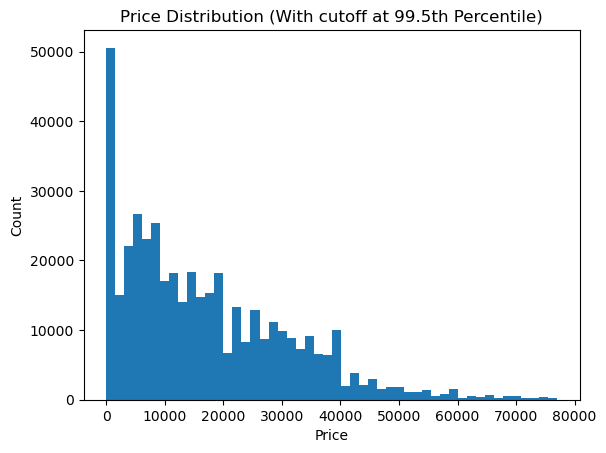

In [160]:
plt.hist(data_with_cutoff['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution (With cutoff at 99.5th Percentile)")
plt.show()

**Observations**
There are extreme price outliers with 99.5% of the vehicles with sale price of less than 77,000. The min value of the price column is 0 and max is ~3B which indicates data errors and unrealistic price values. There seems to be significant number of entries with price as zero, which are certainly not useful for the model, requiring the data cleanup during preparation phase.


## Explore numerical features and their influence on price

* Describe the numerical features year and odometer

In [161]:
data[['year', 'odometer']].describe()

,year,odometer
count,"425,675.00","422,480.00"
mean,"2,011.24","98,043.33"
std,9.45,"213,881.50"
min,"1,900.00",0.00
25%,"2,008.00","37,704.00"
50%,"2,013.00","85,548.00"
75%,"2,017.00","133,542.50"
max,"2,022.00","10,000,000.00"


* Plot a scatter plot to visualize the relationship between year and price for a sample of 1000 rows

<Axes: xlabel='year', ylabel='price'>

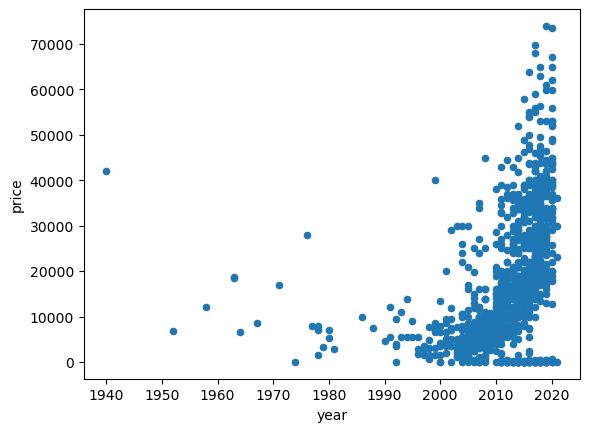

In [162]:
data_with_cutoff.sample(1000).plot.scatter(x='year', y='price')

* Plot a scatter plot to visualize the relationship between odometer and price for a sample of 1000 rows

<Axes: xlabel='odometer', ylabel='price'>

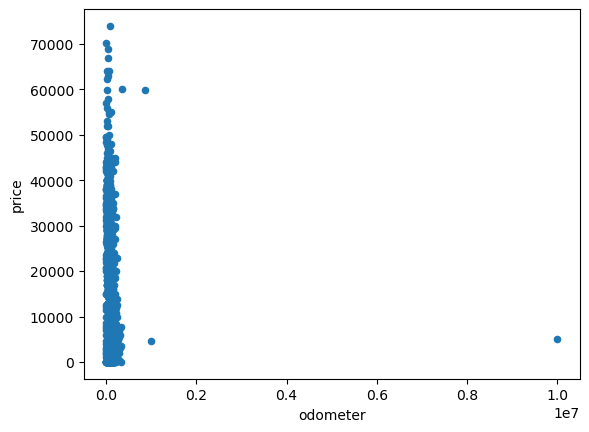

In [163]:
data_with_cutoff.sample(1000).plot.scatter(x='odometer', y='price')

**Observations**
Analysis of the numerical features, year and odometer, indicates that newer used vehicles and those with lower mileage generally have higher prices. However, there are older highly valued and newer low valued cars indicate that additional factors play significant role for the used car prices. 

## Explore Categorial Features

### Manufacturer vs Price
Plot a bar chart to visualize the brand influence on the price

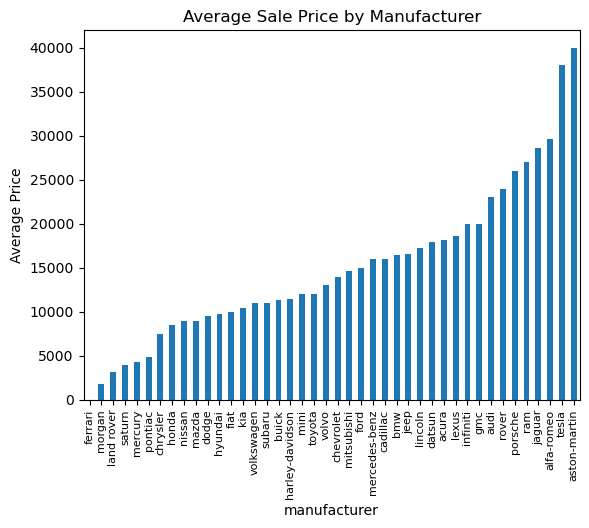

In [164]:
data_manufacturer = data_with_cutoff.groupby('manufacturer')['price'].median().sort_values()
data_manufacturer.plot(kind='bar', title='Average Sale Price by Manufacturer')
plt.ylabel('Average Price')
plt.xticks(fontsize='8')
plt.show()

Plot a box plot to visualize the variance of prices for each brand

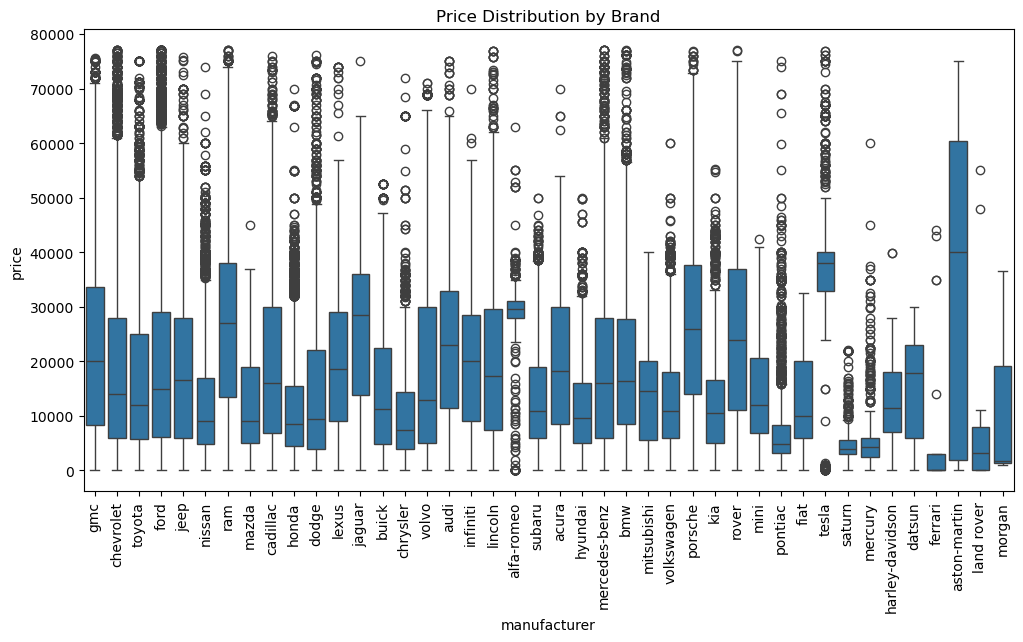

In [165]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_with_cutoff, x='manufacturer', y='price')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

**Observation**
* The bar plot for average sale price by manufacturer shows there are certain brands (like aston-martin, porsche, tesla) that are highly valued than others indicating brand driven price premiums in the used car market. This means the car brand should have weightage when identifying the influence of vehicle features on the price.
* Tesla shows a narrow interquartile (IQR) range indicating consistent resale price likely due to standard configuration with relatively less variance.
* Cars brands like Aston Martin shows higher variance, possibly driven by vehicle models and condition. This shows that manufacturer level aggregation during modeling alone is not sufficient as it may hide other feature level effects.
* For serveral manufacturers, the minimum price is at 0 indicating data quality issues.
* For many brands, there are extreme outliers indicating a certain unique features may be driving a higher or lower prices.

### Condition vs Price 
Plot a boxplot to visualize the price spread by vehicle condition

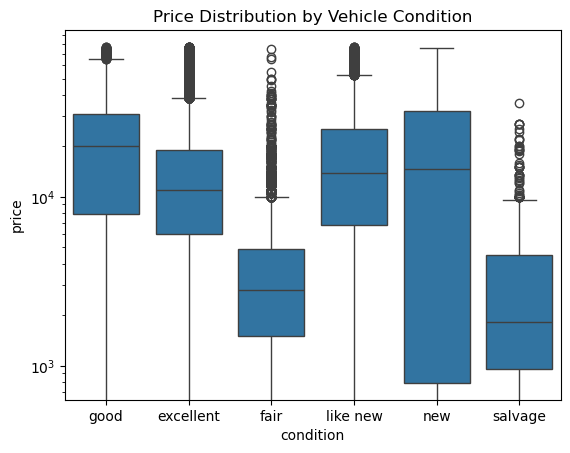

In [166]:
sns.boxplot(data=data_with_cutoff, x='condition', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Condition')
plt.show()

**Observation** The box plot indicates that average sale price for used cars is significantly higher for "new", "like new" conditions compared to "fair" and "salvage" conditions. Vehicle condition strongly correlates with the price but some anomolies exist that some "good" cars are priced higher than "new" cars likely due to outliers such as luxary vehicles or premium brands. May be grouping certain similar condition types into one group may help to differentiate the price differences based on the condition.

### Fuel Type vs Price
Plot a boxplot to visualize the price spread by fuel type (such as gas, electric)

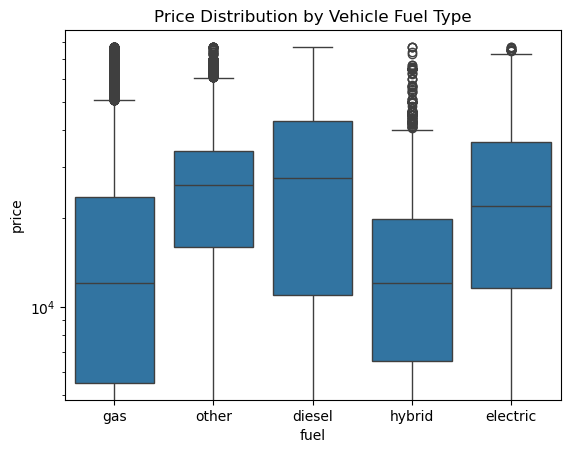

In [167]:
sns.boxplot(data=data_with_cutoff, x='fuel', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Fuel Type')
plt.show()

**Observation**
Fuel type influence the used car prices significantly. Diesel vehicles are most expensive on average, slighly above 'electric' and 'other' fuel types while 'gas' and 'hybrid' fuel types are cheaper. Diesel vehicles likely include luxary, larger vehicles which explains the higher price. Outliers exist in all the fuel types indicating presence of luxary models. So fuel type is meaningful categorial feature influencing the price of used cars.

### Transmission vs Price

Plot a boxplot to visualize the price spread by transmission type

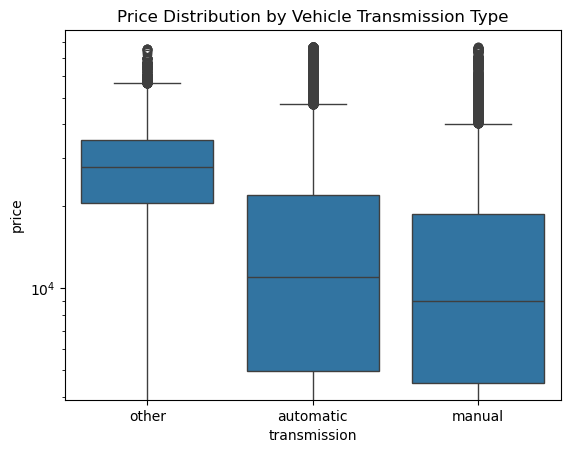

In [168]:
sns.boxplot(data=data_with_cutoff, x='transmission', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Transmission Type')
plt.show()

**Observation**
Transmission type has significant effect on the used car prices. The 'other' transmission types (possibly transmissions like CVT, Dual Clutch) are most expensive likey luxary models. The manual transmission cars are less expensive compared to automatic transmission cars. 

### Vehicle Type vs Price

Plot a boxplot to visualize the price spread by vehicle type (such as sedan, SUV, mini van etc..)

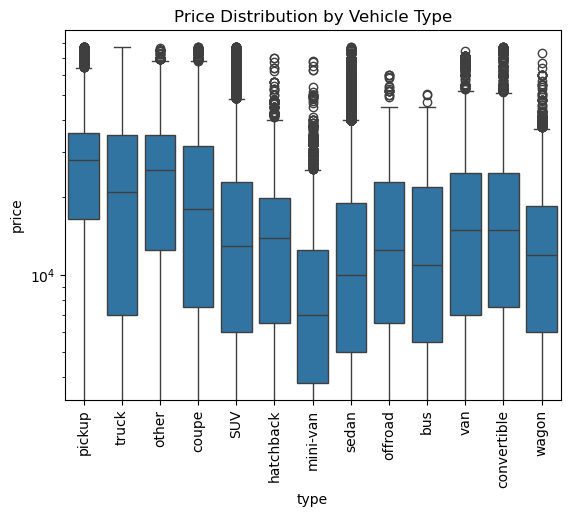

In [169]:
sns.boxplot(data=data_with_cutoff, x='type', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Type')
plt.xticks(rotation=90)
plt.show()

**Observation**
Vehicle type significantly influences the car price. The cars like "truck", "pickup", "coupe" are expensive while types like "sedan", "hatchback", "SUV" are less expensive. Extreme outliers exist across all categories, indicating some luxury models. Vehicle type should be included as a categorical feature in the models.

### Drive vs Price

Plot a boxplot to visualize the price spread by drive mode (FWD,RWD,4WD)

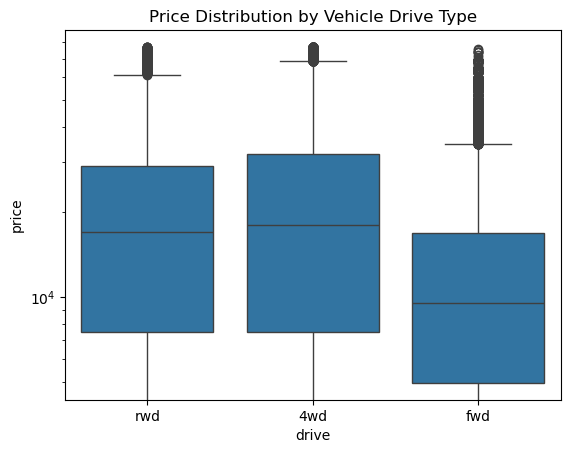

In [170]:
sns.boxplot(data=data_with_cutoff, x='drive', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Drive Type')
plt.show()

**Observation**
Drive type significantly impacts used car prices. 4WD vehicles are most expensive on average, RWD vehicles are moderately priced, and FWD vehicles tend to be the least expensive. All drive types show extreme outliers, indicating luxury models exist across categories. Drive type should be included as a categorical feature in the models

### Cylinders vs Price

Plot a boxplot to visualize the price spread by number of cylinders

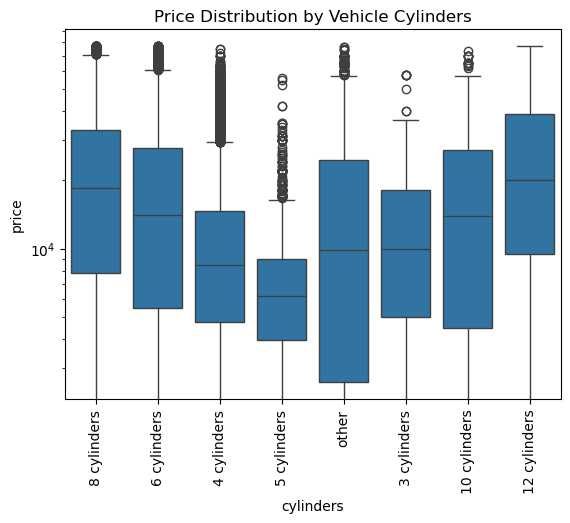

In [171]:
sns.boxplot(data=data_with_cutoff, x='cylinders', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Cylinders')
plt.xticks(rotation=90)
plt.show()

**Observation**
Number of cylinders is positively correlated with used car prices. The cars with more cylinders are generally highly priced where as cars with 3-5 cylinders are lower priced. The number of cylinders should be treated as ordinal feature in the model.

### Title Status vs Price

Plot a boxplot to visualize the price spread by title status (such as clean, lien, missing etc...)

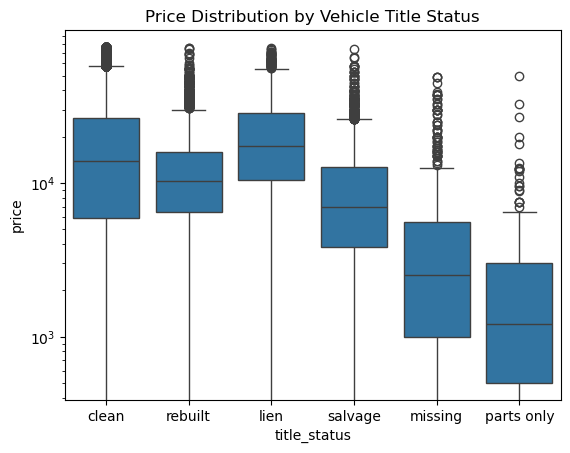

In [172]:
sns.boxplot(data=data_with_cutoff, x='title_status', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Title Status')
plt.show()

**Observation**
Title status is important feature for modeling the car prices. The plot indicates vehicles with titles "salvage", "missing", "parts only" are less expensive. The title status should be treated as ordinal feature with clear ranking from "salvage" to "clean".

### Paint Color vs Price

Plot a boxplot to visualize the price spread by paint color

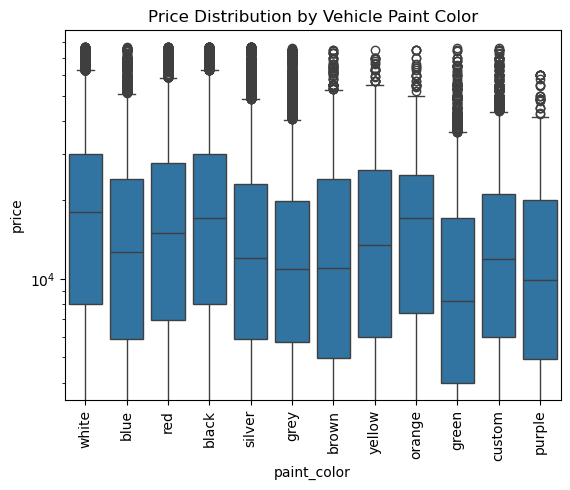

In [173]:
sns.boxplot(data=data_with_cutoff, x='paint_color', y='price')
plt.yscale('log')
plt.title('Price Distribution by Vehicle Paint Color')
plt.xticks(rotation=90)
plt.show()

**Observation**
The paint color does not seem to have significant influence on the used car price. Popular colors (like white, black) tend to retain higher prices.

### State vs Price

Display price distribution statistic for each state to identify if there is a direct correlation based on the state

In [175]:
# Display statistic (count, mean, median, 25% quartile, 75% quartile, min , max) for each state
state_stats = data_with_cutoff.groupby('state')['price'].agg(['count', 'mean', 'median', 'min', 'max', 'quantile'])
state_stats['q1'] = data_with_cutoff.groupby('state')['price'].quantile(0.25)
state_stats['q3'] = data_with_cutoff.groupby('state')['price'].quantile(0.75)
state_stats = state_stats[['count','mean','median','q1','q3','min','max']]

state_stats.sort_values('median', ascending=False)

,count,mean,median,q1,q3,min,max
state,,,,,,,
wv,1041,"23,474.33","24,590.00","11,997.00","33,990.00",0,71988
ak,3451,"23,270.25","21,999.00","13,995.00","30,499.00",0,77000
mt,6244,"22,975.66","21,950.00","9,387.50","35,500.00",0,77000
al,4940,"19,936.68","18,950.00","7,980.00","29,990.00",0,76500
ut,1117,"23,004.28","18,950.00","7,915.00","34,500.00",0,75000
wy,608,"20,821.52","18,500.00","8,570.25","29,999.00",0,74900
mo,4275,"20,553.98","17,990.00","7,995.00","30,868.00",0,76128
hi,2942,"19,071.22","17,888.00","6,000.00","28,444.00",0,76900
tn,11025,"19,032.16","17,483.00","8,900.00","27,900.00",0,76500


### Region vs Price

Display price distribution statistic for each region to identify if there is a direct correlation based on the region

In [176]:
# Display statistic (count, mean, median, 25% quartile, 75% quartile, min , max) for each region
region_stats = data_with_cutoff.groupby('region')['price'].agg(['count', 'mean', 'median', 'min', 'max', 'quantile'])
region_stats['q1'] = data_with_cutoff.groupby('region')['price'].quantile(0.25)
region_stats['q3'] = data_with_cutoff.groupby('region')['price'].quantile(0.75)
region_stats = region_stats[['count','mean','median','q1','q3','min','max']]

region_stats.sort_values('median', ascending=False)

,count,mean,median,q1,q3,min,max
region,,,,,,,
logan,149,"32,753.24","33,999.00","16,999.00","43,888.00",0,74999
scottsbluff / panhandle,116,"31,079.85","32,900.00","18,747.00","43,900.00",0,67900
butte,132,"29,770.02","32,202.00","12,961.25","41,999.00",600,72999
olympic peninsula,701,"31,971.25","31,999.00","18,999.00","42,999.00",0,77000
galveston,225,"29,416.80","30,990.00","22,590.00","37,590.00",1500,73995
...,...,...,...,...,...,...,...
fort smith,326,"9,585.48","4,900.00",0.00,"15,675.00",0,68988
kenosha-racine,756,"10,555.22","4,299.00","2,999.00","14,590.00",0,64995
western IL,62,"10,113.89","1,625.00",0.00,"18,117.50",0,59999


**Observation**
* States such as WV, AK, and MT and regions like Logan, scottsbluff / panhandle and butte show higher median used car prices, indicating premium listings.
* States like MA, OH, and VA and regions such as Klamath Falls, Western IL and Imperial County have much lower median prices, reflecting cheaper listings or potential outliers.
* Both state and region features show wide variability in prices, suggesting the presence of outliers and skewed distributions.
* For modeling, these features can be included, but may grouped using target/ordinal encoding.

## Data Understanding Report

**Initial Data Collection Report**

In this application, Kaggle used car dataset is used. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.

**Data Description Report**

* The dataset consists of data from 426,880 used cars with 18 features (including id column).
* The data contains mix of numerical features (such as price, year and odometer) and categorial features (such as fuel type, manufacturer, transmission) with most of the information stored as objects.
  * Numeric Features: price, year, odometer
  * Categorial Features: region, manufacturer, model, condition, cylinders, fuel, title_status, transmission, VIN, drive, size, type, paint_color, state
* The target variable (i.e., price) is numeric suitable for regression analysis.
* There are significant number of missing values for certain features especially size, VIN, condition, cylinders, drive type, paint color indicating data quality issues.
* There are extreme price outliers with 99.5% of the vehicles with sale price of less than 77,000. The min value of the price column is 0 and max is ~3B which indicates data errors and unrealistic price values. There seems to be significant number of entries with price as zero, which are certainly not useful for the model, requiring the data cleanup during preparation phase.

**Data Exploration Report**

----- Numerical Features -----

**Year** and **Odometer**: Analysis of the numerical features, year and odometer, indicates that newer used vehicles and those with lower mileage generally have higher prices. However, there are older highly valued and newer low valued cars indicate that additional factors play significant role for the used car prices. 

**Price**: There are extreme price outliers with 99.5% of the vehicles with sale price of less than 77,000. So a cutoff is used for analysis for reliable observations. The min value of the price column is 0 and max is ~3B which indicates data errors and unrealistic price values. There seems to be significant number of entries with price as zero, which are certainly not useful for the model, requiring the data cleanup during preparation phase.

----- Categorical Features -----

**Manufacturer**: There are certain brands (like aston martin, porsche, tesla) that are highly valued than others indicating brand driven price premiums in the used car market. This means the car brand should have weightage when identifying the influence of vehicle features on the price. Tesla shows a narrow interquartile (IQR) range indicating consistent resale price likely due to standard configuration with relatively less variance. Cars brands like Aston Martin shows higher variance, possibly driven by vehicle models and condition. This shows that manufacturer level aggregation during modeling may hide other feature level effects. For serveral manufacturers, the minimum price is at 0 indicating data quality issues. For many brands, there are extreme outliers indicating a certain unique features may be driving a higher or lower prices.

**Condition**: Average sale price for used cars is significantly higher for "new", "like new" conditions compared to "fair" and "salvage" conditions. Vehicle condition strongly correlates with the price but some anomolies exist that some "good" cars are priced higher than "new" cars likely due to outliers such as luxary vehicles or premium brands. May be grouping certain similar condition types into one group may help to differentiate the price differences based on the condition.

**Fuel**: Fuel type influence the used car prices significantly. Diesel vehicles are most expensive on average, slighly above 'electric' and 'other' fuel types while 'gas' and 'hybrid' fuel types are cheaper. Diesel vehicles likely include luxary, larger vehicles which explains the higher price. Outliers exist in all the fuel types indicating presence of luxary models. So fuel type is meaningful categorial feature influencing the price of used cars.

**Transmission**: Transmission type has significant effect on the used car prices. The 'other' transmission types (possibly transmissions like CVT, Dual Clutch) are most expensive likey luxary models. The manual transmission cars are less expensive compared to automatic transmission cars.

**Vehicle Type**: Vehicle type significantly influences the car price. The cars like "truck", "pickup", "coupe" are expensive while types like "sedan", "hatchback", "SUV" are less expensive. Extreme outliers exist across all categories, indicating some luxury models. Vehicle type should be included as a categorical feature in the models.

**Drive**: Drive type significantly impacts used car prices. 4WD vehicles are most expensive on average, RWD vehicles are moderately priced, and FWD vehicles tend to be the least expensive. All drive types show extreme high-value outliers, suggesting luxury models exist across categories. Drive type should be included as a categorical feature in the models (4WD > RWD > FWD in average price)

**Cylinders**: Number of cylinders is positively correlated with used car prices. The cars with more cylinders are generally highly priced where as cars with 3-5 cylinders are lower priced. The number of cylinders should be treated as ordinal feature in the model.
More cylinders -> higher price (12 > 8 > 6 > 4).

**Title Status**: Title status is important feature for modeling the car prices. The plot indicates vehicles with titles "salvage", "missing", "parts only" are less expensive. The title status should be treated as ordinal feature with clear ranking from "salvage" to "clean".

**Paint Color**: The paint color does not seem to have significant influence on the used car price. Popular colors (like white, black) tend to retain higher prices.

**State & Region**: States such as WV, AK, and MT and regions like Logan, scottsbluff / panhandle and butte show higher median used car prices, indicating premium listings. States like MA, OH, and VA and regions such as Klamath Falls, Western IL and Imperial County have much lower median prices, reflecting cheaper listings or potential outliers. Both state and region features show wide variability in prices, suggesting the presence of outliers and skewed distributions. For modeling, these features can be included, but may grouped using target/ordinal encoding.

Key Notes:

* Price is influenced by multiple factors: manufacturer, condition, vehicle type, cylinders, drive, year, and odometer.
* Outliers exist in multiple features and should be handled before modeling.
* Some features like VIN and paint_color have no significant influence on the price.

**Data Quality Report**

* Missing Values: There are significant number of missing values for certain features especially size, VIN, condition, cylinders, drive type, paint color indicating data quality issues.

* Anomolies/Outliers: The min value of the price column is 0 and max is ~3B which indicates data errors and unrealistic price values. There seems to be significant number of entries with price as zero, which are certainly not useful for the model, requiring the data cleanup during preparation phase.

# Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Reload Dataset

In [177]:
data = pd.read_csv('data/vehicles.csv')

data_clean = data.copy()

## Apply price cut-off

 A price cut-off of $77,000 is applied that corresponds to 99.5th percentile to reduce influence of extreme outliers while preserving vast majority of the data.

In [178]:
# Identify the price cutoff for various percentiles (75%, 90%, 99.5%)
data_clean['price'].quantile([0.75, 0.90, 0.995])

0.75   26,485.75
0.90   37,590.00
0.99   77,000.00
Name: price, dtype: float64

In [179]:
# Use price cutoff at 99.5% percentile
price_cutoff = data_clean['price'].quantile(0.995)

data_clean = data_clean[data_clean['price'] <= price_cutoff]
data_clean.shape

(424763, 18)

## Apply odometer cut-off
Odometer cut-off of 350K is applied that corresponds to 99.5th percentile to reduce influence of extreme outliers

In [180]:
data_clean['odometer'].quantile([0.75, 0.90, 0.995])

0.75   133,921.00
0.90   177,598.00
0.99   350,000.00
Name: odometer, dtype: float64

In [181]:
# Use odometer cutoff at 99.5% percentile
odo_cutoff = data_clean['odometer'].quantile(0.995)

data_clean = data_clean[data_clean['odometer'] <= odo_cutoff]
data_clean.shape

(418319, 18)

## Exclude features
The features 'id', 'VIN', 'region', 'paint_color' and 'size' are excluded from the dataset.
* id: Unique identifier with no influence on the price
* VIN: No correlation with the price
* model: Very high number of unique categorial values and not generalizable
* region: Overlaps with state and increases the dimensionality
* paint_color: Minimal impact on the price compared to other features
* size: High amount of missing values, redundant with other features like vehicle type (Sedan, SUV etc..)

In [182]:
# Exclude features
features_to_exclude = ['id', 'VIN', 'model', 'region', 'paint_color', 'size']
existing_columns = [col for col in features_to_exclude if col in data_clean.columns]
data_clean = data_clean.drop(columns=existing_columns)

data_clean.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type', 'state'],
      dtype='object')

## Remove invalid values

Rows with invalid zero values for price and odometer are removed as they do not represent realistic values

In [183]:
# Remove the samples that have 0 for 'price' and 'odometer'
data_clean = data_clean[data_clean['price'] > 0]
data_clean = data_clean[data_clean['odometer'] > 0]

data_clean.shape

(386610, 12)

## Handle missing values

Missing values were handled using median imputation for numerical variables and a new category "unknown" for categorical features to preserve information.

In [184]:
# Display missing value count for each column before handling
data_clean.isna().sum().sort_values(ascending=False)

cylinders       156932
condition       147986
drive           117768
type             83695
manufacturer     14824
title_status      7166
fuel              2277
transmission      1509
year              1035
price                0
odometer             0
state                0
dtype: int64

In [185]:
# Fill missing values in 'year' column with median
data_clean = data_clean.fillna({'year': data_clean['year'].median()})

# Fill missing values for other categorial features with "unknown"
cat_cols = ['cylinders', 'condition', 'drive', 'type', 'manufacturer', 'title_status', 'fuel', 'transmission', 'state']
for col in cat_cols:
    data_clean[col] = data_clean[col].fillna('unknown')

# Display missing value count for each column
data_clean.isna().sum().sort_values(ascending=False)

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
state           0
dtype: int64

## Fix Data Types


In [187]:
# Change data type of year, price and odometer to int
data_clean['year'] = data_clean['year'].astype(int)
data_clean['price'] = data_clean['price'].astype(int)
data_clean['odometer'] = data_clean['odometer'].astype(int)

## Create new features

Create new features such as 'vehicle age' which is more generalized than using 'year'

In [188]:
from datetime import date

data_model = data_clean.copy()
# Compute the age of the vehicle and populate new feature vehicle_age
data_model['vehicle_age'] = date.today().year - data_model['year']
data_model.drop(columns='year', inplace=True)

data_model.columns

Index(['price', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'state',
       'vehicle_age'],
      dtype='object')

### Apply cut-off for vehicle_age
There are unrealistic values for vehicle age such as 126. Since 99.5% of the vehicles have age less than 69, apply cut-off to delete unrealistic data and extreme outliers.

In [190]:
# Describe vehicle_age
print(data_model['vehicle_age'].describe())

# list vehicle_age data at 75%, 90%, 99.5% percentile
print(data_model['vehicle_age'].quantile([0.75, 0.90, 0.995]))

count   386,610.00
mean         14.92
std           9.42
min           4.00
25%           9.00
50%          13.00
75%          18.00
max         126.00
Name: vehicle_age, dtype: float64
0.75   18.00
0.90   23.00
0.99   69.00
Name: vehicle_age, dtype: float64


In [191]:
# Use vehicle_age cutoff at 99.5% percentile
age_cutoff = data_model['vehicle_age'].quantile(0.995)

data_model = data_model[data_model['vehicle_age'] <= age_cutoff]
data_model.shape

(384760, 12)

In [192]:
data_model['vehicle_age'].describe()

count   384,760.00
mean         14.60
std           8.17
min           4.00
25%           9.00
50%          13.00
75%          18.00
max          69.00
Name: vehicle_age, dtype: float64

## Split training and test data
Split the prepared dataset into training and test subsets in 80/20 ratio before applying One Hot Encoding and Scaling on the features.

In [193]:
from sklearn.model_selection import train_test_split

X = data_model.drop('price', axis=1)
y = data_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape : ", X_test.shape)


X_train shape:  (307808, 11)
X_test shape :  (76952, 11)


## Apply encoding and scaling
Scale the numeric features and apply one hot encoding for categorial features.
Transform and fit the training data, but only transform the test data.

In [194]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state']
numerical_features = ['vehicle_age', 'odometer'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_scaler', StandardScaler(), numerical_features),
        ('categorial_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
# Only transform test data
X_test_processed = preprocessor.transform(X_test)


# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Regression Models

### Linear Regression
Linear Regression model was selected as baseline model due to its simplicity. It provides benchmark to compare performance of other models.

In [195]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

### Ridge Regression
Linear Regression + L2 regularization. This model is selected due to presence of many correlated features in the data and ridge control overfitting.

In [197]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to create models with give alphas
ridge_gs = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_gs.fit(X_train_processed, y_train)
# Get the best model returned by GridSearchCV
best_ridge = ridge_gs.best_estimator_

best_ridge

Ridge(alpha=10)

### Lasso Regression
Linear Regression + L1 regularization. This model is selected as it performs automtic feature selection and it helps identify key drivers of the price.

**Note**: To improve the performance (on local laptop), the tolerance for Lasso regression is increased to 1e-2 in place of default 1e-4. Also n_jobs parameter is set to "-1" to use all CPU cores.

In [198]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=10000, tol=1e-2)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to identify best model for the given Alphas
lasso_gs = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

lasso_gs.fit(X_train_processed, y_train)
# Get the best model returned by GridSearchCV
best_lasso = lasso_gs.best_estimator_

best_lasso

Lasso(alpha=0.1, max_iter=10000, tol=0.01)

## Compare Models
These 3 models are compared using standard performance metrics Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R2 score. 

In [203]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

models = {
    'Linear Regression': lin_reg,
    'Ridge Regression': best_ridge,
    'Lasso Regression': best_lasso
}

# Compute MSE, RMSE, R2 scores for all the models with the test data
print("%20s %10s %10s %10s" % ('Model', 'MSE', 'RMSE', 'R2'))

for model_name, model in models.items():
    y_pred = model.predict(X_test_processed)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("%20s %10.2f %10.2f %10.5f" % (model_name, mae, rmse, r2))


               Model        MSE       RMSE         R2
   Linear Regression    6091.07    8757.64    0.60215
    Ridge Regression    6090.88    8757.06    0.60220
    Lasso Regression    6090.61    8756.73    0.60223


## Modeling Report

**Models**
Three models were trained and evaluated on the same test dataset:
* Linear Regression (baseline model)
* Ridge Regression
* Lasso Regression

Linear Regression model was selected as baseline model due to its simplicity. It provides benchmark to compare performance of other models. Ridge Regression (Linear Regression + L2 regularization) was selected due to presence of many correlated features in the data and ridge control overfitting. Lesso Regression (Linear Regression + L1 regularization) was selected as it performs automtic feature selection and it helps identify key drivers of the price.

*Note*: When using Lesso Regression, to improve the performance (on local laptop), the tolerance for Lasso regression is increased to 1e-2 in place of default 1e-4. Also n_jobs parameter is set to "-1" to use all CPU cores.

**Model Comparsion**
To compare the performance of the regression models, the following evaluation metrics were used:

* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R2 (R square)

These metrics were computed on the test dataset.

**Results**
The results indicate that all three models perform very similarly, with nearly identical MSE, RMSE, and R2 values. This suggests that the relationship between features and price is largely linear.

# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Model Selection

Compared Linear Regression, Ridge Regression, and Lasso Regression using the evaluation metrics MSE, RMSE, and R2. All three models perform very similarly with nearly identical MSE, RMSE, R2 values. However, Ridge Regression was selected as the final model because it provides regularization, improving stability and reducing potential overfitting while maintaining predictive performance.

*Model Selected: **Ridge Regression***

## Interpreting Coefficients

### List Coefficients

In [204]:
import pandas as pd

feature_names = preprocessor.get_feature_names_out()
coefficients = best_ridge.coef_

# Create Data Frame with the coefficients sorted by absolute values (irrespective of the direction)
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# List coefficients for all the features
pd.set_option('display.max_rows', None) 
print(coef_df)
pd.reset_option('display.max_rows')
    

                                              Feature  Coefficient
40             categorial_encoder__manufacturer_tesla    15,955.24
61                    categorial_encoder__fuel_diesel    11,453.41
35           categorial_encoder__manufacturer_porsche     9,530.41
17   categorial_encoder__manufacturer_harley-davidson    -9,156.23
11            categorial_encoder__manufacturer_datsun     8,652.99
14              categorial_encoder__manufacturer_fiat    -8,113.11
53         categorial_encoder__cylinders_12 cylinders     6,690.86
31        categorial_encoder__manufacturer_mitsubishi    -6,662.73
1                            numeric_scaler__odometer    -5,766.60
54          categorial_encoder__cylinders_3 cylinders    -5,673.87
62                  categorial_encoder__fuel_electric    -5,659.54
83                       categorial_encoder__type_bus    -5,214.63
70        categorial_encoder__title_status_parts only    -4,999.03
23               categorial_encoder__manufacturer_kia    -4,49

### Unscale coefficients for numeric features
Since numeric features were scaled to train the model, we need to unscale those to present realistic insights to dealerships

In [205]:
# Get coefficient for vehicle_age
vehicle_age_coef_scaled = coef_df.loc[
    coef_df['Feature'] == 'numeric_scaler__vehicle_age', 'Coefficient'
].values[0]

# Get coefficient for odometer
odometer_coef_scaled = coef_df.loc[
    coef_df['Feature'] == 'numeric_scaler__odometer', 'Coefficient'
].values[0]

# Get the standard deviation from original data
vehicle_age_std = data_model['vehicle_age'].std()
odometer_std = data_model['odometer'].std()

# Unscale the coefficient for vehicle_age
vehicle_age_coef_unscaled = vehicle_age_coef_scaled / vehicle_age_std
odometer_coef_unscaled = odometer_coef_scaled / odometer_std

# Display the data
print("Vehicle Age - Scaled Coef: %s, Std: %s, Unscaled Coef: %s" % 
      (vehicle_age_coef_scaled, vehicle_age_std, vehicle_age_coef_unscaled))

print("Odometer - Scaled Coef: %s, Std: %s, Unscaled Coef: %s" % 
      (odometer_coef_scaled, odometer_std, odometer_coef_unscaled))

Vehicle Age - Scaled Coef: -3699.272980804363, Std: 8.166209588488877, Unscaled Coef: -452.9975554410058
Odometer - Scaled Coef: -5766.601537955131, Std: 62538.39854297737, Unscaled Coef: -0.09220897356353364


### Interpret the Coefficients of numeric features

The model indicates that
* For each additional year of a vehicle's age, the price decreases by ~$450, holding all other features constant.
* For each additional mile on the odometer, the price decreases by ~\\$0.092 (i.e., \\$92 for every 1,000 miles).

## Evaluation Report

* After training and evaluating multiple regression models: Linear, Ridge, and Lasso regressions, the Ridge regression model was selected as the final model due to its slightly better performance in terms of MSE, RMSE, and R2, and its ability to reduce potentioal overfitting.
* Numeric features such as vehicle age and odometer have negative coefficients, indicating that older cars and higher mileage reduce the  prices.
* Categorical features reveal key drivers: premium brands like Tesla (+15,955), Porsche (+9,530), and Datsun (+8,652) strongly increase the price, while brands like fiat (-8,113), mitsubishi (-6,662.73), hyundai (-4,009) decrease it.
* Other important categories include title status (Parts Only reduces price and Clean titles increase it) and fuel type (diesel increases price).

# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Objective

The business objective of this task is to help car dealerships to understand which vehicle features/characteristics strongly influence the price of used cars so that they can work out on better inventory and pricing decisions. Using provided dataset, we aim to identify the impact of features such as vehicle age, manufacturer, model, transmission type, color, odometer reading and other attributes on the car's sale price. This problem can be framed as supervised regression task where the goal is to develop and train a predictive model to identify the relationship between car's features and its price. The outcome of this task is to provide actionable insights and recommendations to dealerships so that it can help dealers in selecting the inventory with higher resale value and price the cars competitively.

## Key Drivers

### Vehicle Age
New vehicles retain better value. For each additional year of a vehicle's age, the price decreases by ~$450, holding all other features constant.

### Mileage
For each additional mile on the odometer, the price decreases by ~\\$0.092 (i.e., \\$92 for every 1,000 miles).

### Top Categories having positive impact on the price

* Premium brands like Tesla (+15,955), Porsche (+9,530), and Datsun (+8,652) strongly increase the price.
* The diesel fueled cars have higher price (+11,453) compared to other fuel types.
* Clean title status increases the price by (+3,360).
* Pickup trucks provide better sale price compared to other types like SUV, min-van, Sedan etc...
* 4WD vehicles increase the price (+2,622) compared to other types (FWD)


### Top Categories with negative impact on the price
* Mass brands like fiat (-8,113), mitsubishi (-6,662.73), hyundai (-4,009) decrease the price.
* Title status 'parts_only' has higher negative impact on the price (-4,999)
* Used electric vehicles do not increase the prices (unless premium brand like Tesla) when compared to their gas counter parts (-5,659)

## Recommendations

* Focus on adding more low-mileage 4WD vehicles (especially Pickup trucks) to the inventory.
* Acquire premium brands like Tesla, Porsche to maximize margins.
* Add diesel pickup trucks for high value sales. 

## Next Steps

* Update the model periodically with new used car data to reflect changing demand.
* Provide dealer sales data to work on a predictive model that can provide recommendations to maximize the profit based on the margins and volume. 